# Vitalii Naumov (FY46IN) 
# Sakina Hajieva (DKXCU0)

In [1]:
# Some useful imports

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import os

In [2]:
# Creating some tables to store the measured numbers

table_1 = pd.DataFrame(columns=['N','LCC'])
table_1a = pd.DataFrame(columns=['N','LCC','k-1','k+1'])
table_1b = pd.DataFrame(columns=['N','LCC','k-1','k+1'])
table_2 = pd.DataFrame(columns=['LCC','p'])

In [3]:
# A function which calculates Susceptibility

def Calc_chi_and_S(network):
    _network_N = network.number_of_nodes();
    _comps = nx.connected_components(network);
    _comp_sizes = [len(_comp) for _comp in _comps];
    _sort_c_sizes = sorted(_comp_sizes,reverse=True);
    _lcs = _sort_c_sizes[0]/_network_N;
    _chi = 0;
    if len(_sort_c_sizes) > 1:
        _chi = sum([_sort_c_sizes[i]*_sort_c_sizes[i] for i in range(1,len(_sort_c_sizes))]);
        return _chi/(len(_sort_c_sizes)),_lcs;
    else:
        return _chi,_lcs;

# How does the size of the largest connected component scale with the system size (N) at the critical point?

### First simulation is dependent of k, number of samples = 2, range of network size is [1000,10000] with a step of 500 nodes. k parameter varies from 0.05 to 3 with a step of 0.05, so for each network size N there will be generated 59 different networks with different probability p. The average size of a largest connected component (LCC) will be calculated for each network size as well. 

In [ ]:
for N in range(1000,10500,500):
    num_samp = 2
    k_list = np.arange(0.05,3.0,0.05)
    av_chi, av_lcc_size = [],[]
    av_chi.clear()
    av_lcc_size.clear()
    
    print('Computing LCC for {} nodes...'.format(N))
    for k in k_list:

        chi_values, comp_sizes = [],[]
        comp_sizes.clear()
        chi_values.clear()
        
        for i in range(0,num_samp):
            ER_graph = nx.generators.erdos_renyi_graph(N,k/(N-1.0))

            chi,S = Calc_chi_and_S(ER_graph)
            chi_values.append(chi)

            largest_comp_size = len(max(nx.connected_components(ER_graph), key = len))
            comp_sizes.append(largest_comp_size)

        av_chi.append(np.mean(chi_values))
        av_lcc_size.append(np.mean(comp_sizes))
    
    table_1a = table_1a.append({'LCC':av_lcc_size[av_chi.index(max(av_chi))], 
                              'N':N, 'k-1':k_list[av_chi.index(max(av_chi))-1],
                              'k+1':k_list[av_chi.index(max(av_chi))+1]},ignore_index=True)

In [5]:
table_1a

,N,LCC,k-1,k+1
0,1000.0,58.0,1.00,1.10
1,1500.0,162.5,1.05,1.15
2,2000.0,187.5,1.05,1.15
3,2500.0,428.5,1.05,1.15
4,3000.0,170.0,1.00,1.10
5,3500.0,289.0,1.00,1.10
6,4000.0,833.0,1.15,1.25
7,4500.0,1179.0,1.10,1.20
8,5000.0,401.5,1.00,1.10
9,5500.0,641.0,1.05,1.15


### Some pictures of the generated graphs with a 1000 links.

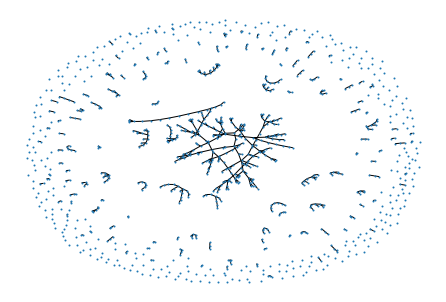

In [44]:
# Below the critical point
ER_graph = nx.generators.erdos_renyi_graph(1000,1.0/(1000.0-1.0))
nx.draw(ER_graph, pos=nx.spring_layout(ER_graph),node_size=1)

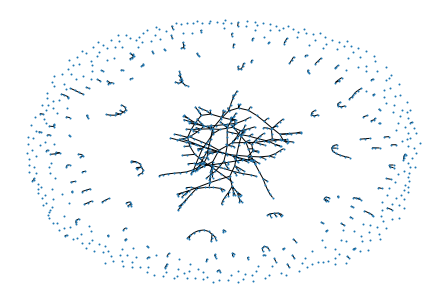

In [45]:
# Above the critical point
ER_graph = nx.generators.erdos_renyi_graph(1000,1.10/(1000.0-1.10))
nx.draw(ER_graph, pos=nx.spring_layout(ER_graph),node_size=1)

## It is not clearly visible the actual difference on the pictures above, so we decided to create a different type of simulation which will show how networks below critical point differ from ones above it.  

### Low node number simulation of 10 networks with size from 5 to 50, 3 networks will be generated for each number of nodes,  k parameter varies from 0.05 to 3 with a step of 0.05, so for each network size N there will be generated 59 different networks with different probability p. The average size of a LCC will be calculated for each network size as well.

In [4]:
for N in range(5,55,5):
    num_samp = 3
    k_list = np.arange(0.05,3.0,0.05);
    av_chi, av_lcc_size = [],[]
    av_chi.clear()
    av_lcc_size.clear()
    
    print('Computing LCC for {} nodes...'.format(N))
    for k in k_list:

        chi_values, comp_sizes = [],[]
        comp_sizes.clear()
        chi_values.clear()
        
        for i in range(0,num_samp):
            ER_graph = nx.generators.erdos_renyi_graph(N,k/(N-1.0))

            chi,S = Calc_chi_and_S(ER_graph)
            chi_values.append(chi)

            largest_comp_size = len(max(nx.connected_components(ER_graph), key = len))
            comp_sizes.append(largest_comp_size)

        av_chi.append(np.mean(chi_values))
        av_lcc_size.append(np.mean(comp_sizes))
    
    table_1b = table_1b.append({'LCC':av_lcc_size[av_chi.index(max(av_chi))], 
                              'N':N, 'k-1':k_list[av_chi.index(max(av_chi))-1],
                              'k+1':k_list[av_chi.index(max(av_chi))+1]},ignore_index=True)

Computing LCC for 5 nodes...
Computing LCC for 10 nodes...
Computing LCC for 15 nodes...
Computing LCC for 20 nodes...
Computing LCC for 25 nodes...
Computing LCC for 30 nodes...
Computing LCC for 35 nodes...
Computing LCC for 40 nodes...
Computing LCC for 45 nodes...
Computing LCC for 50 nodes...


In [5]:
table_1b

,N,LCC,k-1,k+1
0,5.0,2.666667,0.75,0.85
1,10.0,4.666667,1.25,1.35
2,15.0,9.666667,1.50,1.60
3,20.0,10.666667,1.55,1.65
4,25.0,18.666667,2.20,2.30
5,30.0,9.000000,1.05,1.15
6,35.0,17.333333,1.50,1.60
7,40.0,20.333333,1.40,1.50
8,45.0,26.666667,1.60,1.70
9,50.0,28.666667,1.55,1.65


In [ ]:
# Generating images below the critical point 

os.mkdir('/content/-')

for i in range(len(table_1b)):
  graph = nx.generators.erdos_renyi_graph(int(table_1b['N'][i]), table_1b['k-1'][i] / (table_1b['N'][i] - table_1b['k-1'][i]))
  nx.draw(graph, node_size=50)
  plt.savefig('/content/-/{}-.png'.format(i), dpi=300, bbox_inches='tight')

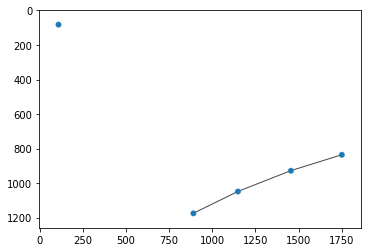

In [8]:
img = plt.imread('/content/-/0-.png')
plt.imshow(img)

In [ ]:
# Generating images above the critical point

os.mkdir('/content/+')

for i in range(len(table_1b)):
  graph = nx.generators.erdos_renyi_graph(int(table_1b['N'][i]), table_1b['k+1'][i] / (table_1b['N'][i] - table_1b['k+1'][i]))
  nx.draw(graph, node_size=50)
  plt.savefig('/content/+/{}+.png'.format(i), dpi=300, bbox_inches='tight')

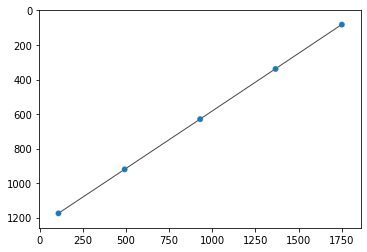

In [10]:
img = plt.imread('/content/+/0+.png')
plt.imshow(img)

In [11]:
# Loading a list of images

bel = []
for pic in np.sort(os.listdir('/content/-')):
  img = plt.imread('/content/-/'+pic)
  bel.append(img)

ab = []
for pic in np.sort(os.listdir('/content/+')):
  img = plt.imread('/content/+/'+pic)
  ab.append(img)

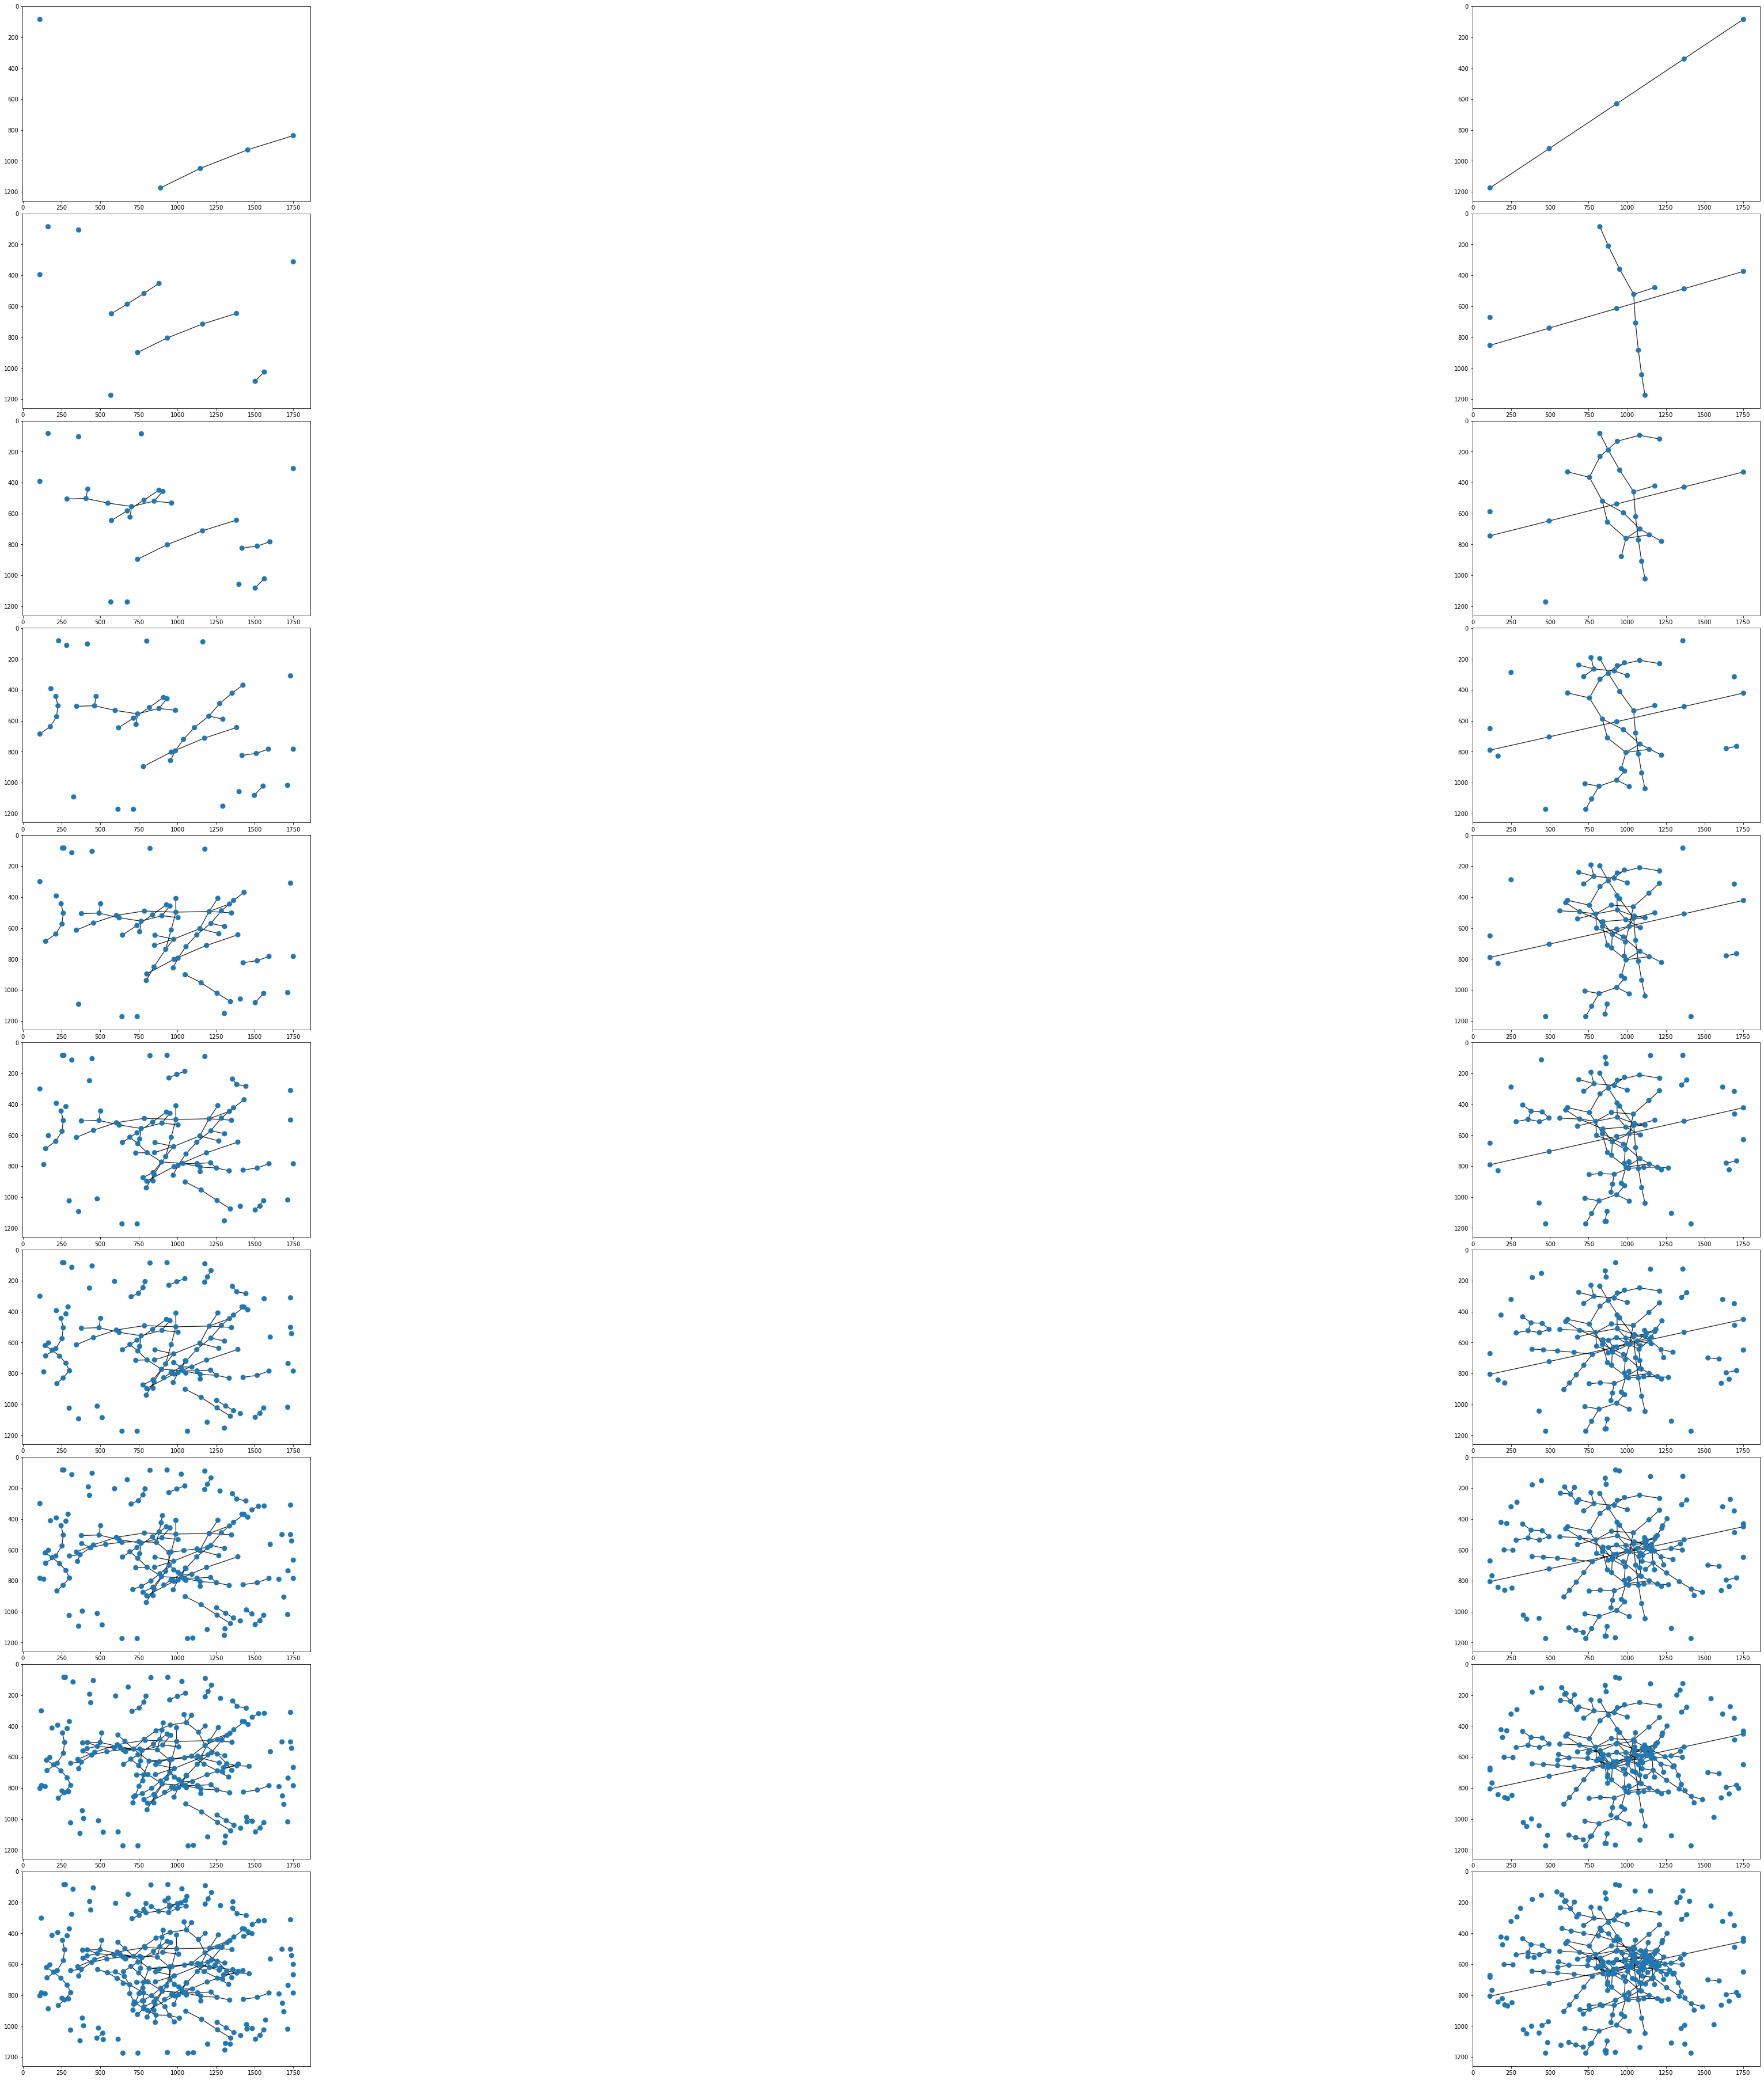

In [21]:
# Plotting images to compare

fig=plt.figure(figsize=(100, 50))

columns = 2
rows = 10

for i in range(10):
    img = bel[i]
    fig.add_subplot(rows, columns, i*2+1)
    plt.imshow(img)

for i in range(10):
    img = ab[i]
    fig.add_subplot(rows, columns, i*2+2)
    plt.imshow(img)


fig.tight_layout(pad=0.1)

plt.show()

### Independent of k, it is deprecated since the probability is now set to 0001, 3 networks will be generated for each number of nodes. The average size of LCC will be calculated for each network size as well. 

In [ ]:
for N in range(1000,25000,500):
    num_samp = 3
    p = 0.0001
    av_chi, av_lcc_size = [],[]
    av_chi.clear()
    av_lcc_size.clear()
    
    print('Computing LCC for {} nodes...'.format(N))
    
    chi_values, comp_sizes = [],[]
    comp_sizes.clear()
    chi_values.clear()
    
    for i in range(0,num_samp):
        ER_graph = nx.generators.erdos_renyi_graph(N,p)

        chi,S = Calc_chi_and_S(ER_graph)
        chi_values.append(chi)

        largest_comp_size = len(max(nx.connected_components(ER_graph), key = len))
        comp_sizes.append(largest_comp_size)

    av_chi.append(np.mean(chi_values))
    av_lcc_size.append(np.mean(comp_sizes))

    table_1 = table_1.append({'LCC':av_lcc_size[av_chi.index(max(av_chi))], 'N':N},ignore_index=True)


Computing LCC for 1000 nodes...
Computing LCC for 1500 nodes...
Computing LCC for 2000 nodes...
Computing LCC for 2500 nodes...
Computing LCC for 3000 nodes...
Computing LCC for 3500 nodes...
Computing LCC for 4000 nodes...
Computing LCC for 4500 nodes...
Computing LCC for 5000 nodes...
Computing LCC for 5500 nodes...
Computing LCC for 6000 nodes...
Computing LCC for 6500 nodes...
Computing LCC for 7000 nodes...
Computing LCC for 7500 nodes...
Computing LCC for 8000 nodes...
Computing LCC for 8500 nodes...
Computing LCC for 9000 nodes...
Computing LCC for 9500 nodes...
Computing LCC for 10000 nodes...
Computing LCC for 10500 nodes...
Computing LCC for 11000 nodes...
Computing LCC for 11500 nodes...
Computing LCC for 12000 nodes...
Computing LCC for 12500 nodes...
Computing LCC for 13000 nodes...
Computing LCC for 13500 nodes...
Computing LCC for 14000 nodes...
Computing LCC for 14500 nodes...
Computing LCC for 15000 nodes...
Computing LCC for 15500 nodes...
Computing LCC for 16000 node

In [ ]:
table_1

,N,LCC
0,1000.0,3.333333
1,1500.0,4.333333
2,2000.0,5.666667
3,2500.0,7.333333
4,3000.0,7.666667
5,3500.0,7.333333
6,4000.0,11.000000
7,4500.0,13.333333
8,5000.0,16.666667
9,5500.0,17.333333


### Scaling of LCC

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

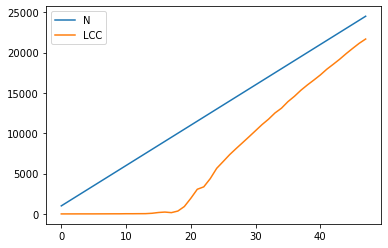

In [ ]:
# On this graph we might see how the average size of LCC grows 
# along with a number of nodes in the system

plt.figure()
table_1.plot()

In [ ]:
scale = []
for i in range(len(table_1['LCC'])):
    scale.append(table_1['LCC'][i] / table_1['N'][i])
scale, len(scale)

([0.0033333333333333335,
  0.0028888888888888888,
  0.0028333333333333335,
  0.0029333333333333334,
  0.0025555555555555557,
  0.0020952380952380953,
  0.00275,
  0.0029629629629629632,
  0.0033333333333333335,
  0.0031515151515151513,
  0.004555555555555556,
  0.0041025641025641026,
  0.004666666666666666,
  0.004844444444444445,
  0.010208333333333333,
  0.021019607843137254,
  0.02585185185185185,
  0.017052631578947368,
  0.03576666666666667,
  0.08733333333333333,
  0.17603030303030304,
  0.2658550724637681,
  0.2797222222222222,
  0.34997333333333336,
  0.4350512820512821,
  0.4812345679012346,
  0.5250714285714285,
  0.5589425287356322,
  0.5889777777777777,
  0.6175483870967742,
  0.6450208333333334,
  0.671030303030303,
  0.6907254901960784,
  0.7151619047619048,
  0.728,
  0.7522702702702703,
  0.7671754385964913,
  0.786051282051282,
  0.7992,
  0.8093658536585366,
  0.820111111111111,
  0.8342015503875968,
  0.8431363636363637,
  0.8525185185185186,
  0.8640144927536232,
  

In [ ]:
table_1['Scale'] = scale
table_1

,N,LCC,Scale
0,1000.0,3.333333,0.003333
1,1500.0,4.333333,0.002889
2,2000.0,5.666667,0.002833
3,2500.0,7.333333,0.002933
4,3000.0,7.666667,0.002556
5,3500.0,7.333333,0.002095
6,4000.0,11.000000,0.002750
7,4500.0,13.333333,0.002963
8,5000.0,16.666667,0.003333
9,5500.0,17.333333,0.003152


<AxesSubplot:>

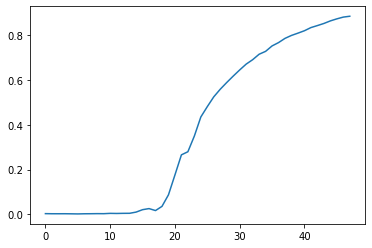

In [ ]:
# This graph represents the scaling itself , 
# so we might see that after 40 iterations 
# with the given above parameters the scale goes above 0.8

table_1['Scale'].plot()

# How does the size of the largest connected component grow with p at the critical point?

### To answer this question we generated 99 networks with 5000 nodes, number of samples set to 2, probability range [0.00001, 0.001] with a step of 0.00001. Then average number of LCC was calculated with respect to each p. 

In [ ]:
for p in np.arange(0.00001, 0.001, 0.00001):
    
    N = 5000
    num_samp = 2
    
    av_chi, av_lcc_size = [],[]
    av_chi.clear()
    av_lcc_size.clear()
    
    print('Computing LCC with p = {}'.format(p))
    
    chi_values, comp_sizes = [],[]
    comp_sizes.clear()
    chi_values.clear()
    for i in range(0,num_samp):
        ER_graph = nx.generators.erdos_renyi_graph(N, p)

        chi,S = Calc_chi_and_S(ER_graph)
        chi_values.append(chi)

        largest_comp_size = len(max(nx.connected_components(ER_graph), key = len))
        comp_sizes.append(largest_comp_size)

    av_chi.append(np.mean(chi_values))
    av_lcc_size.append(np.mean(comp_sizes))

    table_2 = table_2.append({'LCC':av_lcc_size[av_chi.index(max(av_chi))], 'p':p},ignore_index=True)
   

Computing LCC with p = 1e-05
Computing LCC with p = 2e-05
Computing LCC with p = 3.0000000000000004e-05
Computing LCC with p = 4e-05
Computing LCC with p = 5e-05
Computing LCC with p = 6e-05
Computing LCC with p = 7.000000000000001e-05
Computing LCC with p = 8e-05
Computing LCC with p = 9e-05
Computing LCC with p = 0.0001
Computing LCC with p = 0.00011
Computing LCC with p = 0.00012
Computing LCC with p = 0.00013000000000000002
Computing LCC with p = 0.00014000000000000001
Computing LCC with p = 0.00015000000000000001
Computing LCC with p = 0.00016
Computing LCC with p = 0.00017
Computing LCC with p = 0.00018
Computing LCC with p = 0.00019
Computing LCC with p = 0.0002
Computing LCC with p = 0.00021
Computing LCC with p = 0.00022
Computing LCC with p = 0.00023
Computing LCC with p = 0.00024
Computing LCC with p = 0.00025000000000000006
Computing LCC with p = 0.00026000000000000003
Computing LCC with p = 0.00027000000000000006
Computing LCC with p = 0.00028000000000000003
Computing LCC 

In [ ]:
table_2

,LCC,p
0,3.0,0.00001
1,5.0,0.00002
2,5.5,0.00003
3,7.0,0.00004
4,6.5,0.00005
...,...,...
94,4954.5,0.00095
95,4957.0,0.00096
96,4963.5,0.00097
97,4957.5,0.00098


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

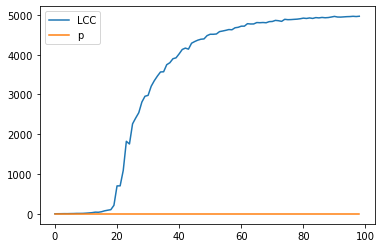

In [ ]:
# On this graph we can see how the size of the largest connected component 
# grow with p at the critical point

plt.figure()
table_2.plot()